In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [10]:
sydney = "/Users/jenny.wade@schibsted.com/Documents/GitHub/Projekt/SydneyHousePrices.csv"
sydney_data = pd.read_csv(sydney)

In [11]:
sydney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199504 entries, 0 to 199503
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        199504 non-null  object 
 1   Id          199504 non-null  int64  
 2   suburb      199504 non-null  object 
 3   postalCode  199504 non-null  int64  
 4   sellPrice   199504 non-null  int64  
 5   bed         199350 non-null  float64
 6   bath        199504 non-null  int64  
 7   car         181353 non-null  float64
 8   propType    199504 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 13.7+ MB


In [12]:
#Checking datatypes 
sydney_data.dtypes

Date           object
Id              int64
suburb         object
postalCode      int64
sellPrice       int64
bed           float64
bath            int64
car           float64
propType       object
dtype: object

In [13]:
#Converting Date column from object to Datetime
sydney_data['Date'] = pd.to_datetime(sydney_data['Date'])

In [14]:
#Converting remaining columns to most suitable types (Such as bed from float to int)
sydney_data = sydney_data.convert_dtypes()

In [16]:
#Counting number of nan values
nan_per_col = sydney_data.isna().sum()
print(nan_per_col)

Date              0
Id                0
suburb            0
postalCode        0
sellPrice         0
bed             154
bath              0
car           18151
propType          0
dtype: int64


In [17]:
#As only bed and car contain nan values and are int I'll fill them with 0
sydney_data = sydney_data.fillna(0)

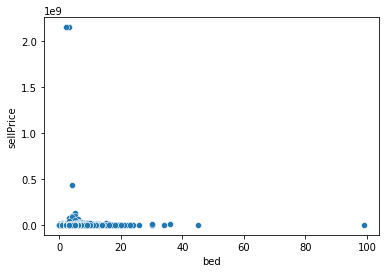

In [18]:
sns.scatterplot(x=sydney_data['bed'], y=sydney_data['sellPrice'])
plt.show()

In [19]:
print(sydney_data['bed'].unique())

<IntegerArray>
[ 4,  3,  5,  6,  2,  7,  8,  1,  0, 10,  9, 12, 15, 19, 26, 20, 14, 24, 13,
 30, 16, 36, 18, 23, 11, 17, 99, 22, 45, 21, 34]
Length: 31, dtype: Int64


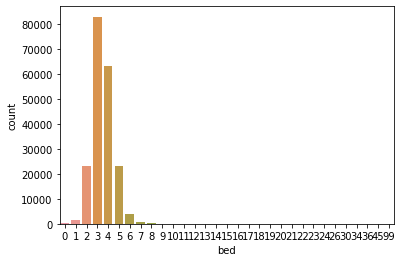

In [20]:
sns.countplot(x=sydney_data['bed'], data=sydney_data)
plt.show()

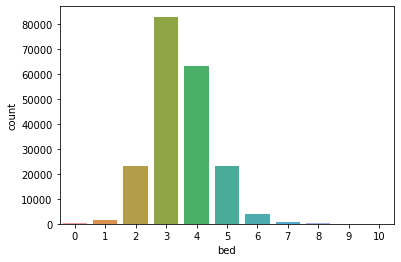

In [23]:
#Taking a look at beds after removing data with 11+ rooms as majority of houses are 
test = sydney_data[sydney_data['bed'] <= 10]
sns.countplot(x=test['bed'], data=test)
plt.show()

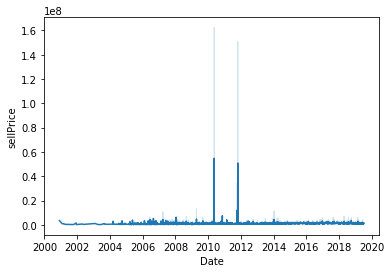

In [24]:
sns.lineplot(x=test['Date'], y=test['sellPrice'])
plt.show()

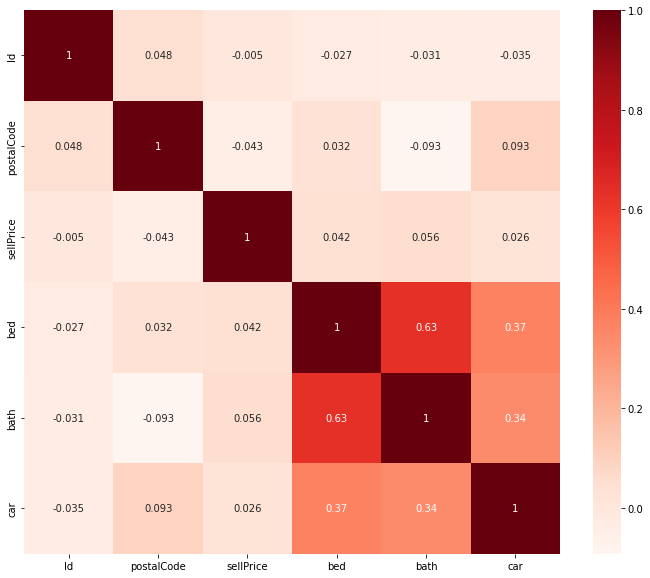

In [27]:
plt.figure(figsize=(12,10))
cor = sydney_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

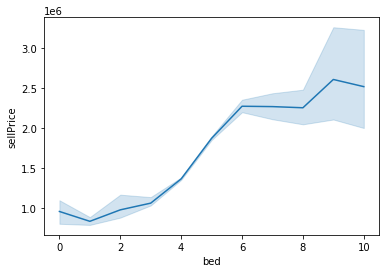

In [28]:
sns.lineplot(x=test['bed'], y=test['sellPrice'])
plt.show()

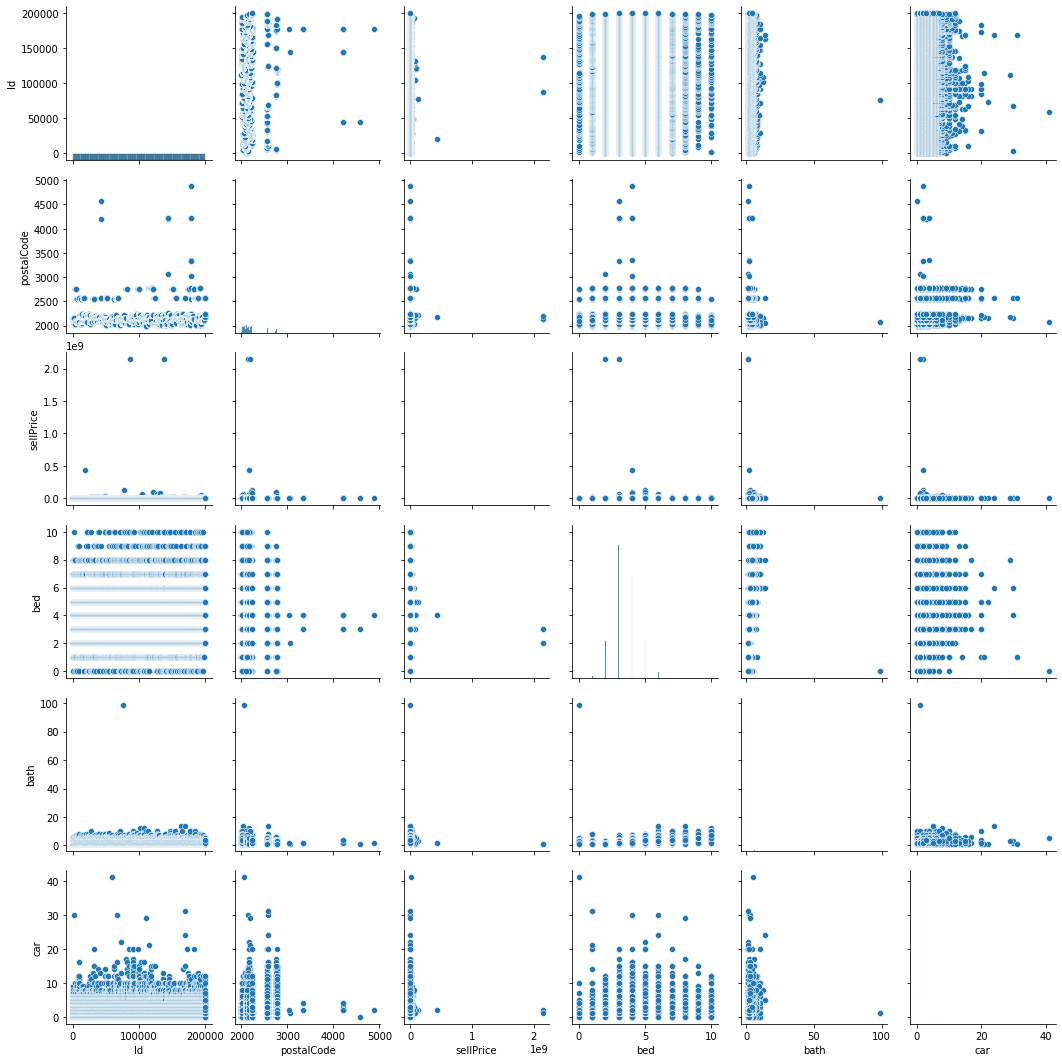

In [29]:
sns.pairplot(test)